In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd

In [2]:
# Read the CSV file with proper data type handling
video1 = pd.read_csv('examples_interactions_pietons/t1_107-119_2023-06-15 08_27_58.csv', sep=';')


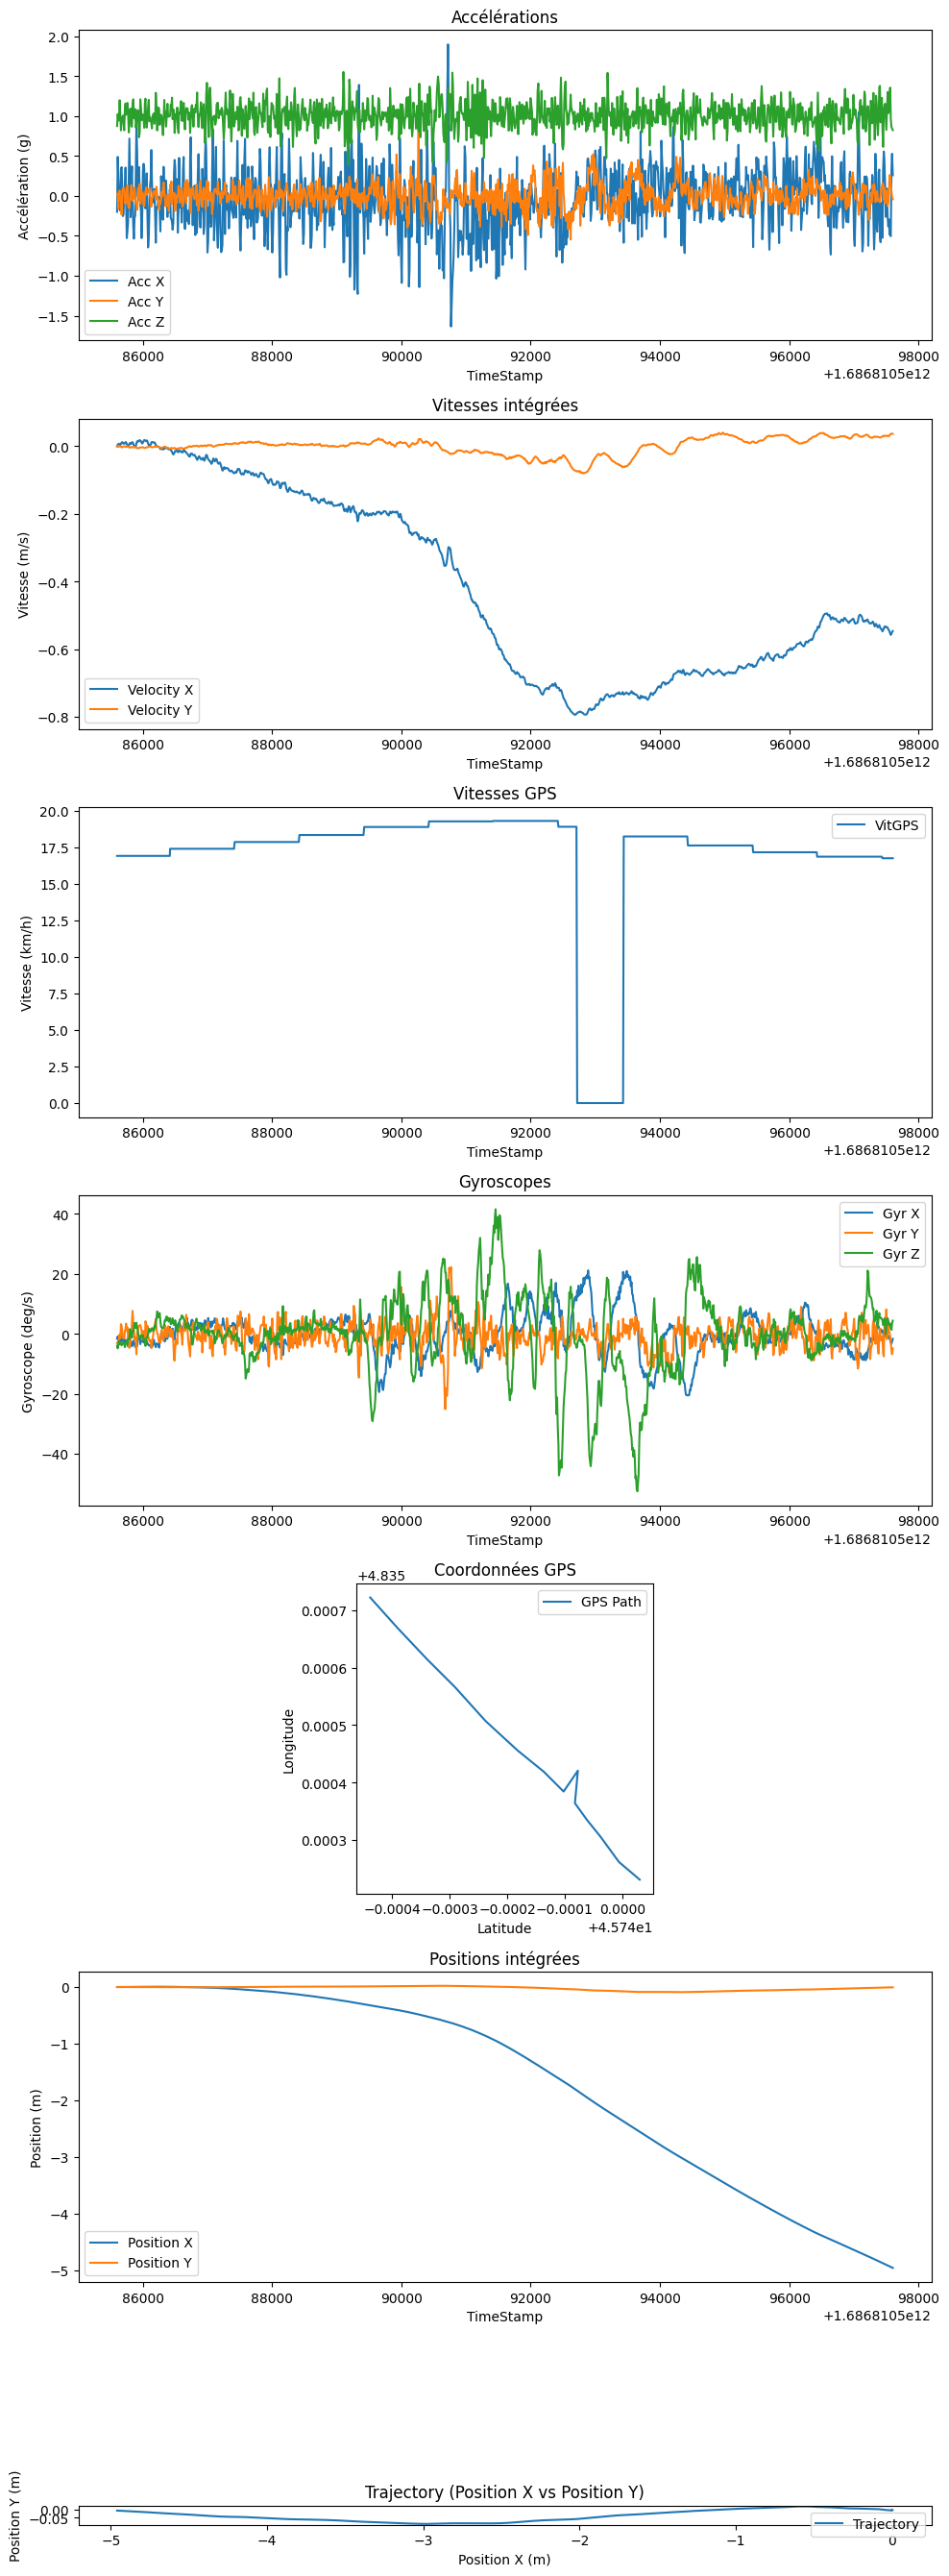

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Calculer la différence de temps entre chaque point de données en secondes
time_diff = np.diff(video1['TimeStamp'], prepend=video1['TimeStamp'].iloc[0]) / 1000.0

# Intégrer les données d'accélération pour obtenir la vitesse
velocity_x = np.cumsum(video1[' AccX(g)'] * time_diff)
velocity_y = np.cumsum(video1[' AccY(g)'] * time_diff)
velocity_z = np.cumsum(video1[' AccZ(g)'] * time_diff)

# Intégrer les vitesses pour obtenir les positions
position_x = np.cumsum(velocity_x * time_diff)
position_y = np.cumsum(velocity_y * time_diff)
position_z = np.cumsum(velocity_z * time_diff)

# Créer une figure et des sous-graphiques
fig, axs = plt.subplots(7, 1, figsize=(10, 28))

# Plot des accélérations
axs[0].plot(video1['TimeStamp'], video1[' AccX(g)'], label='Acc X')
axs[0].plot(video1['TimeStamp'], video1[' AccY(g)'], label='Acc Y')
axs[0].plot(video1['TimeStamp'], video1[' AccZ(g)'], label='Acc Z')
axs[0].set_title('Accélérations')
axs[0].set_xlabel('TimeStamp')
axs[0].set_ylabel('Accélération (g)')
axs[0].legend()

# Plot des vitesses intégrées
axs[1].plot(video1['TimeStamp'], velocity_x, label='Velocity X')
axs[1].plot(video1['TimeStamp'], velocity_y, label='Velocity Y')
axs[1].set_title('Vitesses intégrées')
axs[1].set_xlabel('TimeStamp')
axs[1].set_ylabel('Vitesse (m/s)')
axs[1].legend()

# Plot des vitesses GPS
axs[2].plot(video1['TimeStamp'], video1[' VitGPS(km/h)'], label='VitGPS')
axs[2].set_title('Vitesses GPS')
axs[2].set_xlabel('TimeStamp')
axs[2].set_ylabel('Vitesse (km/h)')
axs[2].legend()

# Plot des gyroscopes
axs[3].plot(video1['TimeStamp'], video1[' GyrX(deg/s)'], label='Gyr X')
axs[3].plot(video1['TimeStamp'], video1[' GyrY(deg/s)'], label='Gyr Y')
axs[3].plot(video1['TimeStamp'], video1[' GyrZ(deg/s)'], label='Gyr Z')
axs[3].set_title('Gyroscopes')
axs[3].set_xlabel('TimeStamp')
axs[3].set_ylabel('Gyroscope (deg/s)')
axs[3].legend()

# Plot des coordonnées GPS
axs[4].plot(video1[' Lat'], video1[' Long'], label='GPS Path')
axs[4].set_title('Coordonnées GPS')
axs[4].set_xlabel('Latitude')
axs[4].set_ylabel('Longitude')
axs[4].legend()
axs[4].set_aspect('equal', 'box')

# Plot des positions intégrées
axs[5].plot(video1['TimeStamp'], position_x, label='Position X')
axs[5].plot(video1['TimeStamp'], position_y, label='Position Y')
axs[5].set_title('Positions intégrées')
axs[5].set_xlabel('TimeStamp')
axs[5].set_ylabel('Position (m)')
axs[5].legend()

# Plot de la trajectoire à partir des positions intégrées
axs[6].plot(position_x, position_y, label='Trajectory')
axs[6].set_title('Trajectory (Position X vs Position Y)')
axs[6].set_xlabel('Position X (m)')
axs[6].set_ylabel('Position Y (m)')
axs[6].legend()
axs[6].set_aspect('equal', 'box')

# Ajuster l'espacement entre les sous-graphiques
plt.tight_layout()

# Afficher les graphiques
plt.show()

In [4]:
from shapely.geometry import Point

test_geojson = gpd.read_file('examples_interactions_pietons/t1_107-119_2023-06-15 08_27_58.csv')
test_geojson['Long'] = pd.to_numeric(test_geojson['Long'], errors='coerce')
test_geojson['Lat'] = pd.to_numeric(test_geojson['Lat'], errors='coerce')
test_geojson = test_geojson.dropna(subset=['Long', 'Lat'])

geometry = [Point(xy) for xy in zip(test_geojson['Long'], test_geojson['Lat'])]
geo_df = gpd.GeoDataFrame(test_geojson, geometry=geometry)

# Enregistrer la GeoDataFrame en tant que fichier GeoJSON
geo_df.to_file('trajectorey_point.geojson', driver='GeoJSON')

/Users/martin.dejaeghere/miniconda3/lib/python3.12/site-packages/pyogrio/geopandas.py:662: UserWarning: 'crs' was not provided.  The output dataset will not have projection information defined and may not be usable in other systems.
  write(
